<a href="https://colab.research.google.com/github/imansrf/disaster_area_identification/blob/main/Identification_Disaster__Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impor Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Membuat Folder

In [2]:
import shutil
import os, sys

## create folders
if not os.path.exists('data/'):
    os.makedirs('data/data_disaster')
    os.makedirs('data/train_images/pre_images')
    os.makedirs('data/train_images/post_images')
    os.makedirs('data/train_images/pre_buildings')
    os.makedirs('data/train_images/post_buildings')
    os.makedirs('data/train_labels/pre_labels')
    os.makedirs('data/train_labels/post_labels')

# Compress Citra ke 24 bit

In [3]:
import glob
from PIL import Image

src ='gdrive/My Drive/Data disaster/train/images/'
dest= 'data/data_disaster/'

for filename in os.listdir(src):
        im = Image.open(src + filename).convert('RGB')
        print (im.mode)
        im.save(dest + filename)

RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB


In [4]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='data/data_disaster/'
dest = 'data/train_images/pre_images/'
pre_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_images:
    shutil.copy(source + f, dest)

In [5]:
source ='data/data_disaster/'
dest = 'data/train_images/post_images/'
post_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_images:
    shutil.copy(source + f, dest)

In [6]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='gdrive/My Drive/Data disaster/train/labels/'
dest = 'data/train_labels/pre_labels/'

pre_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_labels:
    shutil.copy(source + f, dest)

In [7]:
source ='gdrive/My Drive/Data disaster/train/labels/'
dest = 'data/train_labels/post_labels/'

post_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_labels:
    shutil.copy(source + f, dest)

# Data Exploration

In [8]:
import pandas as pd

ROOT_PATH = ''

In [9]:
import json
from pandas.io.json import json_normalize

with open (ROOT_PATH + 'data/train_labels/post_labels/palu-tsunami_00000002_post_disaster.json') as f:
    data = json.load(f)

# convert buildings json data into pandas dataframe:
buildings_raw = data['features']['xy']
buildings_df = pd.DataFrame.from_dict(json_normalize(buildings_raw), orient='columns')
buildings_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((827.1947747991766 38.05266036150195,...",building,no-damage,971e02df-cb7f-4db6-986e-a5759d37d7ee
1,"POLYGON ((923.0499820392861 35.6899999230119, ...",building,no-damage,6a02f21b-8059-4c83-bb79-ba975e738794
2,"POLYGON ((956.5165597985542 29.71629280817124,...",building,no-damage,c81fa786-4e7f-40b9-b042-fdb60ba02072
3,"POLYGON ((882.8796877291832 35.17580075222946,...",building,no-damage,0e5a70c7-1a2a-4fe5-9123-239c39424bc6
4,"POLYGON ((1007.785306028995 66.74944906072707,...",building,no-damage,a3466f3d-ca9c-4d2f-b9c2-84c074eec59d
...,...,...,...,...
316,"POLYGON ((58.5599604418947 36.33943248283705, ...",building,no-damage,53094760-b84c-4d41-809e-aeae364a9852
317,"POLYGON ((330.7137329339447 264.3348219249181,...",building,no-damage,a2587212-d3f3-4667-9b5d-5471c4eba416
318,"POLYGON ((441.7511553920975 426.538227628857, ...",building,no-damage,dcb92240-f195-4010-9bf4-2d8af4f3447f
319,"POLYGON ((416.9513452483098 883.4820980865841,...",building,destroyed,e72a7a48-b375-4901-bd91-38c0e28712b8


In [10]:
# for a single image
buildings_df['properties.subtype'].value_counts()

no-damage        273
destroyed         34
major-damage      11
un-classified      3
Name: properties.subtype, dtype: int64

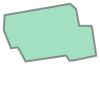

In [11]:
from shapely.geometry import Polygon
import shapely.wkt

P = shapely.wkt.loads(data['features']['xy'][0]['wkt'])
P

In [12]:
P.bounds

(789.0198001272803, 34.43021750760312, 845.709982047345, 69.81869768562817)

In [13]:
# get all files for post disaster
directory = ROOT_PATH + 'data/train_labels/post_labels/'
pattern = 'post'

post_disaster_files = [f for f in os.listdir(directory) if pattern in f]

In [14]:
# loop over post disaster data
all_json_data = []
for file in post_disaster_files:
    with open(directory + file) as f:
        data = json.load(f)
        all_json_data.append(data)

In [15]:
df = pd.DataFrame()
for curr_data in all_json_data:
    curr_building_raw = curr_data['features']['xy']
    df = df.append(json_normalize(curr_building_raw))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((55.0405378956678 74.59986338288715, ...",building,no-damage,41da548d-50ad-413d-a889-56eaea067062
1,"POLYGON ((54.1699810478758 52.67999990314197, ...",building,no-damage,6868b350-e466-4201-98ea-e40cb64fcdf8
2,"POLYGON ((80.02998104606775 76.77999990226267,...",building,no-damage,8d7729f9-d109-429c-b02e-0a3a63ad31b6
3,"POLYGON ((61.03998105006076 53.54999990460529,...",building,no-damage,2773eb85-3a2c-4b7a-bf17-896f00b7891d
4,"POLYGON ((40.88349849964015 24.17512790855112,...",building,no-damage,5cbd01f8-3209-44b7-9e4c-b2c4b8bcdced
...,...,...,...,...
95,"POLYGON ((125.1778218547872 67.615297267711, 1...",building,no-damage,204060c0-fef8-4d28-a7b8-ddb6794c615d
96,"POLYGON ((135.1699812267663 47.32999989914772,...",building,no-damage,3360c571-ea1d-48e6-b93f-b6a693c99a59
97,"POLYGON ((142.5730692695807 27.27929252690081,...",building,no-damage,d8807d5c-0b55-4461-87b9-3753328a18f8
98,"POLYGON ((74.76998252947143 75.8685114841136, ...",building,no-damage,3c3bdce5-d847-41e5-8354-8d77efeb8ad6


In [16]:
### Building damages for hurricanes
post_disaster_tsunami_files = [f for f in os.listdir(directory) if 'tsunami' in f]
post_disaster_tsunami_files = list(filter(lambda x: 'post' in x, post_disaster_tsunami_files))

In [17]:
tsunami_json_data = []
for file in post_disaster_tsunami_files:
    with open(directory + file) as f:
        data = json.load(f)
        tsunami_json_data.append(data)

In [18]:
df_tsunami = pd.DataFrame()
for curr_tsunami_data in tsunami_json_data:
    df_tsunami = df_tsunami.append(json_normalize(curr_tsunami_data['features']['xy']))
df_tsunami

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((55.0405378956678 74.59986338288715, ...",building,no-damage,41da548d-50ad-413d-a889-56eaea067062
1,"POLYGON ((54.1699810478758 52.67999990314197, ...",building,no-damage,6868b350-e466-4201-98ea-e40cb64fcdf8
2,"POLYGON ((80.02998104606775 76.77999990226267,...",building,no-damage,8d7729f9-d109-429c-b02e-0a3a63ad31b6
3,"POLYGON ((61.03998105006076 53.54999990460529,...",building,no-damage,2773eb85-3a2c-4b7a-bf17-896f00b7891d
4,"POLYGON ((40.88349849964015 24.17512790855112,...",building,no-damage,5cbd01f8-3209-44b7-9e4c-b2c4b8bcdced
...,...,...,...,...
95,"POLYGON ((125.1778218547872 67.615297267711, 1...",building,no-damage,204060c0-fef8-4d28-a7b8-ddb6794c615d
96,"POLYGON ((135.1699812267663 47.32999989914772,...",building,no-damage,3360c571-ea1d-48e6-b93f-b6a693c99a59
97,"POLYGON ((142.5730692695807 27.27929252690081,...",building,no-damage,d8807d5c-0b55-4461-87b9-3753328a18f8
98,"POLYGON ((74.76998252947143 75.8685114841136, ...",building,no-damage,3c3bdce5-d847-41e5-8354-8d77efeb8ad6


In [19]:
# for hurricane buildings:
df_tsunami['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

In [20]:
from shapely.geometry import Polygon

polygon_data = []
for image_meta in tsunami_json_data:
    for building in image_meta['features']['xy']:
        polygon_data.append((building['wkt'], building['properties']['subtype']))

polygon_bounds = []
for polygon in polygon_data:
    shapely_obj = shapely.wkt.loads(polygon[0])
    poly_bound = shapely_obj.bounds
    polygon_bounds.append((poly_bound[2]-poly_bound[0], poly_bound[3]-poly_bound[1]))

#P = shapely.wkt.loads(tsunami_json_data['features']['xy'][0]['wkt'])

In [21]:
polygon_widths = [polygon[0] for polygon in polygon_bounds]
polygon_y = [polygon[1] for polygon in polygon_bounds]

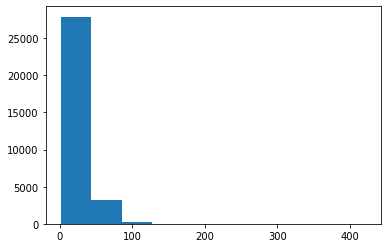

67.05647510955342

In [22]:
import matplotlib.pyplot as plt
import math
import numpy as np

poly_x_log = [math.log(polygon) for polygon in polygon_widths]
# plt.hist(poly_x_log)
plt.hist(polygon_widths)
plt.show()

#find 98 percentile
np_p_widths = np.array(polygon_widths)
crop_lim = np.percentile(np_p_widths, 98)
crop_lim #calculates the 98 percentile

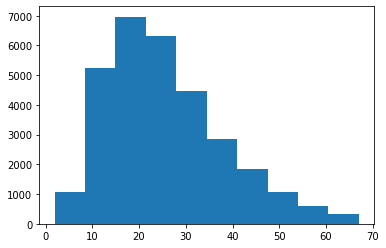

In [23]:
cropped_widths = [x for x in polygon_widths if x <= crop_lim]
plt.hist(cropped_widths)
plt.show()

In [24]:
print(len(polygon_widths))
print(len(cropped_widths))

31394
30766


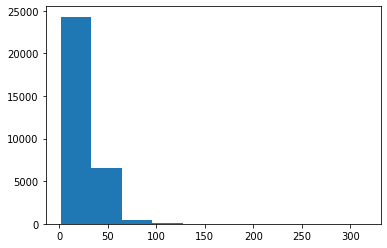

In [25]:
plt.hist(polygon_y)
plt.show()

In [26]:
cropped_y = [y for y in polygon_y if y <= 75]
print(len(polygon_y))
print(len(cropped_y))

31394
31113


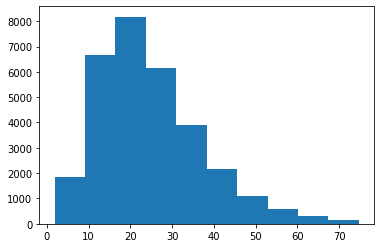

In [27]:
plt.hist(cropped_y)
plt.show()

In [28]:
# for all buildings:
df['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

# Membuat Building Polygons


In [29]:
from PIL import Image, ImageDraw
import numpy
import shutil
import os
import json
from shapely.geometry import Polygon
import shapely.wkt

In [30]:
image_source = 'data/train_images/pre_images/'
dest = 'data/train_images/pre_buildings/'

pre_tsunami_images = sorted([f for f in os.listdir(image_source)])



In [31]:
def getBuildingImage(image, poly_xy, building_poly):
    imArray = numpy.asarray(image)
    
    # create mask
    maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
    ImageDraw.Draw(maskIm).polygon(poly_xy, outline=1, fill=1)
    mask = numpy.array(maskIm)
    
    # assemble new image (uint8: 0-255)
    newImArray = numpy.empty(imArray.shape,dtype='uint8')

    # colors (three first columns, RGB)
    newImArray[:,:,:3] = imArray[:,:,:3]

    # transparency (4th column)
    newImArray[:,:,3] = mask*255

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")
    
    #crop out just the building from image
    poly_bounds = building_poly.bounds
    cropped_building_img = newIm.crop(poly_bounds)
    
    #put center of cropped image onto standarized image size
    img_w, img_h = cropped_building_img.size
    background = Image.new('RGBA', (50, 50), (255, 255, 255, 0))
    bg_w, bg_h = background.size
    offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
    background.paste(cropped_building_img, offset)
    return background

In [32]:
## get json data for this file
json_source = 'data/train_labels/pre_labels/'
pre_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_tsunami_images)
for image_index in range(len(pre_tsunami_images)):
    image = Image.open(image_source + pre_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + pre_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        
        building_number = str(building_counter)
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
            
        formatted_building_image.save(dest + pre_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

In [33]:
## same thing for post images
image_source = 'data/train_images/post_images/'
dest = 'data/train_images/post_buildings/'

post_tsunami_images = sorted([f for f in os.listdir(image_source)])

## get json data for this file
json_source = 'data/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_hurricane_images)
len(post_tsunami_images)
for image_index in range(len(post_tsunami_images)):
    image = Image.open(image_source + post_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + post_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        building_number = str(building_counter)
        
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
        
        formatted_building_image.save(dest + post_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

In [34]:
damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

len(damage_labels)

31394

# Transfer Learning

In [35]:
from keras.applications.resnet50 import ResNet50, preprocess_input

In [36]:
HEIGHT = 197
WIDTH = 197

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))

In [37]:
import numpy as np
import json
import os
post_building_files = sorted(os.listdir('data/train_images/post_buildings'))

json_source = 'data/train_labels/post_labels/'
post_hurricane_jsons = sorted([f for f in os.listdir(json_source)])

damage_labels = []
for image_json in post_hurricane_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

In [38]:
from PIL import Image

Images = []
for f in post_building_files:
    Images.append(Image.open('data/train_images/post_buildings/' + f).convert('RGB'))
    
X_post = []
for I in Images:
    X_post.append(np.asarray(I))
    
X_post = np.array(X_post)
X_post.shape

(31394, 50, 50, 3)

In [39]:
X_post_padded = [np.pad(img, ((73, 74), (73, 74), (0,0)), 'constant', constant_values=(255,)) for img in X_post]

In [40]:
X_post_padded = np.array(X_post_padded)
X_post_padded.shape

(31394, 197, 197, 3)

In [41]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

## remove the FC layers
dropout = 0.5
num_classes = 2
FC = [1024, 1024]

for layer in base_model.layers:
    layer.trainable = False
    
x = base_model.output
x = Flatten()(x)

for fc in FC:
    x = Dense(fc, activation='relu')(x)
    x = Dropout(dropout)(x)

# new softmax layer:
predictions = Dense(num_classes, activation='softmax')(x)

new_model = Model(inputs=base_model.input, outputs=predictions)

# CNN model

In [42]:
import os
import numpy as np
import json

In [43]:
X = []
Y = []

pre_building_files = sorted(os.listdir('data/train_images/pre_buildings'))
post_building_files = sorted(os.listdir('data/train_images/post_buildings'))

In [44]:
json_source = 'data/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

In [45]:
from PIL import Image

Images = []
for f in pre_building_files:
    Images.append(Image.open('data/train_images/pre_buildings/' + f).convert('RGB'))

In [46]:
X_pre = []
for I in Images:
    X_pre.append(np.asarray(I))

In [47]:
X_pre = np.array(X_pre)
X_pre.shape

(31394, 50, 50, 3)

In [48]:
Images = []
for f in post_building_files:
    Images.append(Image.open('data/train_images/post_buildings/' + f).convert('RGB'))

In [49]:
X_post = []
for I in Images:
    X_post.append(np.asarray(I))

In [50]:
X_post = np.array(X_post)
X_post.shape

(31394, 50, 50, 3)

In [51]:
X = np.concatenate((X_pre, X_post), axis=3)
X.shape

(31394, 50, 50, 6)

In [52]:
len(damage_labels)

31394

In [53]:
label_map = {'no-damage': 0, 'minor-damage': 1, 'major-damage': 2, 'destroyed': 3, 'un-classified': 4}

for label in damage_labels:
    Y.append(label_map[label])

In [54]:
train_X = X.astype('float32')[:int(0.8*len(X))]
test_X = X.astype('float32')[int(0.8*len(X)):]
train_Y = Y[0:int(0.8*len(Y))]
test_Y = Y[int(0.8*len(Y)):]

In [55]:
print(test_Y.count(0))
print(test_Y.count(1))
print(test_Y.count(2))
print(test_Y.count(3))
print(test_Y.count(4))

4592
0
134
1519
34


In [56]:
# train_X = X.astype('float32')
# train_X /= 255

# train_Y = Y

# train_X.shape

train_X /= 255
test_X /= 255

train_X.shape

(25115, 50, 50, 6)

In [57]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Reshape
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.constraints import max_norm

model = Sequential()

In [58]:
# Define the network
# as first layer in a Sequential model
model.add(Reshape((50,50,6))),
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='glorot_normal', input_shape=(50, 50,6)))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3), padding='same', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512, kernel_initializer='glorot_normal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='glorot_normal'))
model.add(Activation('sigmoid'))


# Defining loss and optimizer
optimizer = "adam"
loss = 'binary_crossentropy'
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])


In [ ]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)
batch_size = 64
EPOCHS = 20

# test the network:
history=model.fit(train_X, train_Y, batch_size=batch_size, epochs=EPOCHS, validation_split=0.2, verbose=1, shuffle=True)

In [69]:
test_predict_Y = model.predict(test_X, batch_size=batch_size, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
test_predict_Y

array([[0.      ],
       [0.525052],
       [0.525052],
       ...,
       [1.      ],
       [0.      ],
       [0.525052]], dtype=float32)

In [70]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

correct_damaged = 0
correct_undamaged = 0
incorrect_damaged = 0
incorrect_undamaged = 0
for index in range(len(test_Y)):
    if int(test_Y[index]) > 0:
        if int(test_predict_Y[index]) > 0:
            correct_damaged += 1
        else:
            incorrect_damaged += 1
    else:
        if int(test_predict_Y[index]) > 0:
            incorrect_undamaged += 1
        else:
            correct_undamaged += 1

print('# of damaged buildings correctly labeled as damaged: ', correct_damaged)
print('# of damaged buildings incorrectly labeled as undamaged: ', incorrect_damaged)
print('# of undamaged buildings correctly labeled as undamaged: ', correct_undamaged)
print('# of undamaged buildings incorrectly labeled as damaged: ', incorrect_undamaged)
    
#multilabel_confusion_matrix(test_Y, test_predict_Y)

# of damaged buildings correctly labeled as damaged:  634
# of damaged buildings incorrectly labeled as undamaged:  1053
# of undamaged buildings correctly labeled as undamaged:  3481
# of undamaged buildings incorrectly labeled as damaged:  1111


In [73]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
plt.plot(history.history["acc"],label="Akurasi Pelatihan")
plt.plot(history.history["val_acc"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kegagalan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kegagalan")
plt.legend()
plt.show()

NameError: ignored